In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from skimage import color
from skimage import io

In [ ]:
def arrange_data(df):
    
    image_data = []
    print(np.asarray(df.iloc[:, 1]))
    img_paths = "drive/MyDrive/poster-dataset/" + np.asarray(df.iloc[:, 1] + ".jpg") #First column is the image paths
    
    for i in tqdm(range(len(img_paths))):
    
        img = image.load_img(img_paths[i], target_size=(200, 150, 3))
        img = image.img_to_array(img)
        img = img/255
        image_data.append(img)
        
        
    X = np.array(image_data)
    Y = np.array(df.iloc[:,3:12])
    
    print("Shape of images:", X.shape)
    print("Shape of labels:", Y.shape)
    
    return X, Y

In [ ]:
print("Processing train..")
train_df = pd.read_csv("drive/MyDrive/poster-dataset/finegrained_poster_train_data_multihotencoded.csv")
X, Y = arrange_data (train_df)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.75, stratify=Y)

Processing train..


  0%|          | 0/88 [00:00<?, ?it/s]

['100earthquake' '2012' 'advcom-rio' 'adventuresinzambezia'
 'alitabattleangel' 'annihilation' 'awalktoremember'
 'billandtedfacethemusic' 'casinoroyale' 'centralintelligence' 'coldskin'
 'crazyrichasians' 'dayofthedeadbloodline' 'deepbluesea2' 'divergent'
 'downsizing' 'enterthefatdragon' 'epic' 'equals' 'extraction'
 'fastandfurious4' 'flood' 'forbiddencitycop' 'furious7' 'geostorm'
 'getsmart' 'goosebumps2hauntedhalloween' 'grownups' 'gulliverstravels'
 'hailcaesar' 'her' 'highrise' 'holidate' 'home' 'hottubtimemachine'
 'indianajonesandthelastcrusade' 'intothestorm' 'iorigins'
 'ipman4thefinale' 'jackthegiantslayer' 'jasonbourne' 'johnnyenglish'
 'journeytothewestthedemonsstrikeback' 'jumanjithenextlevel'
 'keepingupwiththejoneses' 'kickboxervengeance' 'kingsmanthesecretservice'
 'kungfuhustle' 'lalaland' 'lastchristmas' 'lifeofpi' 'madmaxfuryroad'
 'masterztheipmanlegacy' 'missionimpossible' 'missionimpossiblefallout'
 'missionimpossibleroguenation' 'mortalkombat' 'mrandmrssmith'


100%|██████████| 88/88 [00:37<00:00,  2.36it/s]

Shape of images: (88, 200, 150, 3)
Shape of labels: (88, 9)


# Making Poster Model

In [ ]:
num_labels = 9  # Types of Genres

from tensorflow.keras.applications.vgg16 import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(200,150, 3))
# Freeze the layers except the last 3 layers
for layer in vgg_conv.layers[:-3]:
    layer.trainable = False

In [ ]:
# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

num_labels = 9

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_labels activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              12583936  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 9225      
Total params: 27,307,849
Trainable params: 17,312,777
Non-trainable params: 9,995,072
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, 
                         shear_range=0.15,horizontal_flip=True, fill_mode="nearest")

In [ ]:
import tensorflow as tf

In [ ]:
EPOCHS=30
BS = 4

history = model.fit(aug.flow(X_train, Y_train, batch_size=BS),validation_data=(X_valid, Y_valid), 
                    steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

model.save('poster-model.h5')

Epoch 1/30
16/16 [==============================] - 37s 288ms/step - loss: 0.5986 - accuracy: 0.2581 - val_loss: 0.4828 - val_accuracy: 0.2273
Epoch 2/30
16/16 [==============================] - 1s 41ms/step - loss: 0.4949 - accuracy: 0.1452 - val_loss: 0.4612 - val_accuracy: 0.4091
Epoch 3/30
16/16 [==============================] - 1s 37ms/step - loss: 0.4893 - accuracy: 0.2742 - val_loss: 0.4534 - val_accuracy: 0.3182
Epoch 4/30
16/16 [==============================] - 1s 38ms/step - loss: 0.4700 - accuracy: 0.2742 - val_loss: 0.4495 - val_accuracy: 0.4091
Epoch 5/30
16/16 [==============================] - 1s 39ms/step - loss: 0.4446 - accuracy: 0.4032 - val_loss: 0.4469 - val_accuracy: 0.3636
Epoch 6/30
16/16 [==============================] - 1s 38ms/step - loss: 0.4587 - accuracy: 0.3226 - val_loss: 0.4411 - val_accuracy: 0.4091
Epoch 7/30
16/16 [==============================] - 1s 38ms/step - loss: 0.4435 - accuracy: 0.3226 - val_loss: 0.4382 - val_accuracy: 0.4091
Epoch 8/30


In [ ]:
from keras import models

In [ ]:
def accuracy_score(test_path, model_path):
    
    test_df = pd.read_csv(test_path)
    X_test, Y_test = arrange_data (test_df)
    model = models.load_model(model_path)

    pred = model.predict(np.array(X_test))
    count = 0
    for i in tqdm(range(len(pred))):
        value = 0
        
        first2_index = np.argsort(pred[i])[-2:]
        correct = np.where(Y_test[i] == 1)[0]
        for j in first2_index:
            if j in correct:
                value += 1
                
        if (value>0):
            count=count+1
                
    print("Images having atleast one genre correctly identified",count)
    print("Total number of images =",len(pred))
    print("Accuracy = ", count/len(pred))

# Test Accuracy to File

In [ ]:
accuracy_score('drive/MyDrive/poster-dataset/finegrained_poster_test_data_multihotencoded.csv', 'drive/MyDrive/poster-dataset/poster-model.h5')

  0%|          | 0/22 [00:00<?, ?it/s]

['jumanjiwelcometothejungle' 'paul' 'shaolinsoccer' 'spectre' 'sputnik'
 'thecore' 'thediscovery' 'theedgeofseventeen'
 'thefastandthefurioustokyodrift' 'thefinalmaster' 'thekissingbooth'
 'theperfectstorm' 'thephotograph' 'thering'
 'theseventhadventuresofsinbad' 'thismeanswar' 'triplefrontier'
 'tronlegacy' 'vampiresvsthebronx' 'womb' 'worldwarz' 'zoolander2']


100%|██████████| 22/22 [00:07<00:00,  2.79it/s]


Shape of images: (22, 200, 150, 3)
Shape of labels: (22, 9)


100%|██████████| 22/22 [00:00<00:00, 5974.79it/s]

Images having atleast one genre correctly identified 19
Total number of images = 22
Accuracy =  0.8636363636363636



# Test in Single Image

In [ ]:
import tensorflow as tf

In [ ]:
def find_genre(test_path, model_path):
    model = models.load_model(model_path) 
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))
    print(prob)
    
    classes = ['disaster','scifi','adventure','comedy','action','horror','romance','spy','martialarts']
    for i in range(9):
        print(classes[i], prob[0][i])
        # print("{}".format(classes[i])+" ({:.3})".format(prob[0][[i]]))
    plt.imshow(img)

[[0.01924192 0.29244035 0.10831084 0.2961463  0.3243324  0.14311653
  0.04424445 0.022536   0.035377  ]]
disaster 0.019241916
scifi 0.29244035
adventure 0.10831084
comedy 0.2961463
action 0.3243324
horror 0.14311653
romance 0.04424445
spy 0.022535998
martialarts 0.035377


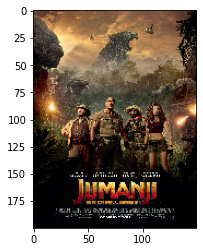

In [ ]:
find_genre("drive/MyDrive/poster-dataset/jumanjiwelcometothejungle.jpg", "drive/MyDrive/poster-dataset/poster-model.h5")

[[0.01519361 0.18261674 0.05712883 0.15105724 0.30200675 0.710849
  0.0389099  0.01959121 0.04988917]]
disaster 0.015193608
scifi 0.18261674
adventure 0.057128828
comedy 0.15105724
action 0.30200675
horror 0.710849
romance 0.038909897
spy 0.01959121
martialarts 0.049889166


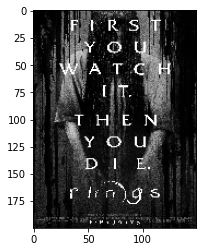

In [ ]:
find_genre("drive/MyDrive/poster-dataset/thering.jpg", "drive/MyDrive/poster-dataset/poster-model.h5")

[[0.03751816 0.22094314 0.02304871 0.13280103 0.17860918 0.03192675
  0.17614573 0.0628309  0.12448119]]
disaster 0.037518162
scifi 0.22094314
adventure 0.023048712
comedy 0.13280103
action 0.17860918
horror 0.031926747
romance 0.17614573
spy 0.0628309
martialarts 0.124481186


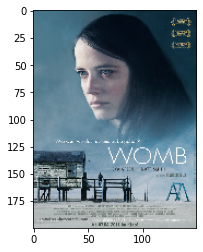

In [ ]:
find_genre("drive/MyDrive/poster-dataset/womb.jpg", "drive/MyDrive/poster-dataset/poster-model.h5")

[[0.08381255 0.15139359 0.05744248 0.07416335 0.56888473 0.1527815
  0.04520352 0.08032218 0.03547788]]
disaster 0.08381255
scifi 0.15139359
adventure 0.05744248
comedy 0.074163355
action 0.56888473
horror 0.1527815
romance 0.045203518
spy 0.08032218
martialarts 0.035477877


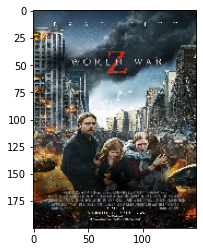

In [ ]:
find_genre("worldwarz.jpg", "drive/MyDrive/poster-dataset/poster-model.h5")

[[0.02432399 0.10395836 0.09955884 0.8998246  0.07603393 0.02417245
  0.48291883 0.09129712 0.17638065]]
disaster 0.024323989
scifi 0.10395836
adventure 0.09955884
comedy 0.8998246
action 0.07603393
horror 0.024172451
romance 0.48291883
spy 0.09129712
martialarts 0.17638065


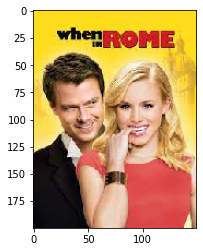

In [ ]:
find_genre("when-in-rome.jpg", "drive/MyDrive/poster-dataset/poster-model.h5")

[[0.05657122 0.12519267 0.03157883 0.1744295  0.6036318  0.0570951
  0.04478563 0.04159275 0.18112181]]
disaster 0.056571223
scifi 0.12519267
adventure 0.03157883
comedy 0.1744295
action 0.6036318
horror 0.057095096
romance 0.044785626
spy 0.041592754
martialarts 0.18112181


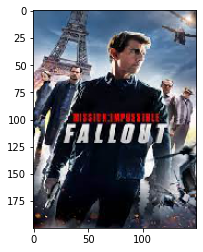

In [ ]:
find_genre("mission-impossible.jpg", "drive/MyDrive/poster-dataset/poster-model.h5")

[[0.58138424 0.70688117 0.10641135 0.11403521 0.05557801 0.06431407
  0.04380136 0.02777454 0.02335692]]
disaster 0.58138424
scifi 0.70688117
adventure 0.10641135
comedy 0.11403521
action 0.055578012
horror 0.06431407
romance 0.043801356
spy 0.027774543
martialarts 0.02335692


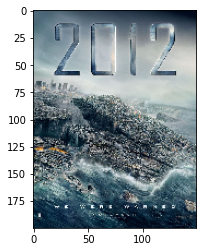

In [ ]:
find_genre("2012.jpg", "drive/MyDrive/poster-dataset/poster-model.h5")